# Financial Analytics

# Data Collection

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv("C:/Users/tudua/Desktop/ML Experiment/Unified Mentor/1. Financial Analytics/Financial Analytics data.csv")

In [5]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [6]:
df.shape

(488, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
 4   Unnamed: 4         0 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [8]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [9]:
df.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN
487,500,L T Foods,NaN,NaN,NaN


In [10]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,459.000000,0.0
mean,251.508197,28043.857119,3807.789412,NaN
std,145.884078,59464.615831,9989.449987,NaN
min,1.000000,3017.070000,0.000000,NaN
25%,122.750000,4843.575000,534.910000,NaN
50%,252.500000,9885.050000,1137.170000,NaN
75%,378.250000,23549.900000,2730.195000,NaN
max,500.000000,583436.720000,110666.930000,NaN


# Data Cleaning

In [11]:
df


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [12]:
print("Null values in the data set:")
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"[{column}] = {null_count}")


Null values in the data set:
[S.No.] = 0
[Name] = 0
[Mar Cap - Crore] = 9
[Sales Qtr - Crore] = 29
[Unnamed: 4] = 488


In [13]:
# Get the maximum serial number present in the DataFrame
max_serial_number = df['S.No.'].max()

# Create a set containing all serial numbers from 1 to the maximum serial number
all_numbers = set(range(1, max_serial_number + 1))

# Get the set of unique serial numbers present in the 'S.No.' column
present_numbers = set(df['S.No.'])

# Find the missing serial numbers by subtracting the set of present numbers from the set of all numbers
missing_numbers = all_numbers.difference(present_numbers)

# Check if there are missing numbers
if missing_numbers:
    print("Numbers not present in ['S.No.'] column:", missing_numbers)
else:
    print("No missing numbers in ['S.No.'] column")


Numbers not present in ['S.No.'] column: {265, 266, 174, 175, 251, 188, 252, 253, 187, 124, 125, 254}


In [14]:
#moving data from column 'Unnamed: 4' to column 'Sales Qtr - Crore'

i = 0
while i < len(df):
    if pd.notnull(df['Unnamed: 4'][i]):
        df.loc[i, 'Sales Qtr - Crore'] = df['Unnamed: 4'][i]
    i += 1


In [15]:
df


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [16]:


df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore     29
Unnamed: 4           488
dtype: int64

In [17]:
del df['Unnamed: 4']

In [18]:
df.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

# Data Analysis

In [19]:
#Largest Company according to Market Cap (in Cr)

sorted_df = df.sort_values(by='Mar Cap - Crore', ascending=False)
largest_company_name = sorted_df.iloc[0]['Name']
largest_company_market_cap = int(sorted_df.iloc[0]['Mar Cap - Crore'])

print("Largest market Cap company: " + largest_company_name)
print("Market cap: " + str(largest_company_market_cap) + " Cr")



Largest market Cap company: Reliance Inds.
Market cap: 583436 Cr


In [20]:
#Smallest Company according to Market Cap (in Cr)

sorted_df = df.sort_values(by='Mar Cap - Crore', ascending=True)
smallest_company_name = sorted_df.iloc[0]['Name']
smallest_company_market_cap = int(sorted_df.iloc[0]['Mar Cap - Crore'])

print("Smallest Company according to Market Cap (in Cr): " + smallest_company_name)
print("Market cap: " + str(smallest_company_market_cap) + " Cr")


Smallest Company according to Market Cap (in Cr): Natl.Fertilizer
Market cap: 3017 Cr


In [21]:
#Largest Company according to Sales Qtr(in Cr)

sorted_df = df.sort_values(by='Sales Qtr - Crore', ascending=False)
largest_sales_company_name = sorted_df.iloc[0]['Name']
largest_sales_quarterly_sales = int(sorted_df.iloc[0]['Sales Qtr - Crore'])

print("Company with Highest Quarterly Sales: " + largest_sales_company_name)
print("Quarterly Sales: " + str(largest_sales_quarterly_sales) + " Cr")


Company with Highest Quarterly Sales: I O C L
Quarterly Sales: 110666 Cr


In [22]:
#Smallest Company according to Sales Qtr(in Cr)

sorted_df = df.sort_values(by='Sales Qtr - Crore', ascending=True)
smallest_sales_company_name = sorted_df.iloc[0]['Name']
smallest_sales_quarterly_sales = int(sorted_df.iloc[0]['Sales Qtr - Crore'])

print("Company with Lowest Quarterly Sales: " + smallest_sales_company_name)
print("Quarterly Sales: " + str(smallest_sales_quarterly_sales) + " Cr")


Company with Lowest Quarterly Sales: Ujjivan Fin.Ser.
Quarterly Sales: 0 Cr


In [23]:
# Pearson Corealtion

df[['Mar Cap - Crore','Sales Qtr - Crore']].corr(method='pearson')


,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.624409
Sales Qtr - Crore,0.624409,1.000000


In [24]:
# Spearman Corealtion

df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr(method='spearman')


,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.674233
Sales Qtr - Crore,0.674233,1.000000


In [25]:
# Kendall Corealtion

df[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr(method='kendall')

,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.493336
Sales Qtr - Crore,0.493336,1.000000


In [26]:
df


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [27]:
# Calculate growth rates for market capitalization and quarterly sales

df['Market Cap Growth Rate'] = df['Mar Cap - Crore'].pct_change() * 100
df['Sales Growth Rate'] = df['Sales Qtr - Crore'].pct_change() * 100

# Identify companies with significant growth potential relative to their competitors
# You can define a threshold for what constitutes "significant growth potential"
significant_growth_companies = df[(df['Market Cap Growth Rate'] > df['Market Cap Growth Rate'].mean()) | (df['Sales Growth Rate'] > df['Sales Growth Rate'].mean())]

# Print companies with significant growth potential
print("Companies with significant growth potential:")
print(significant_growth_companies[['Name', 'Market Cap Growth Rate', 'Sales Growth Rate']])

Companies with significant growth potential:
                 Name  Market Cap Growth Rate  Sales Growth Rate
5      Hind. Unilever               -0.425603         -48.992044
17               NTPC               -0.726077          77.232277
18   Sun Pharma.Inds.               -0.848782         -67.973854
19          Hind.Zinc               -0.726155         -10.990602
28      IndusInd Bank               -0.913775         -92.928015
..                ...                     ...                ...
483   Lak. Vilas Bank               -0.063665          29.618937
484             NOCIL               -0.109256         -68.453624
485     Orient Cement               -0.064106         105.211217
486   Natl.Fertilizer               -0.239723         455.343773
487         L T Foods                0.000000           0.000000

[354 rows x 3 columns]


In [28]:
# Calculate growth rates for market capitalization and quarterly sales

df['Market Cap Growth Rate'] = df['Mar Cap - Crore'].pct_change() * 100
df['Sales Growth Rate'] = df['Sales Qtr - Crore'].pct_change() * 100

# Define criteria for attractive investment opportunities
criteria = (
    (df['Market Cap Growth Rate'] > 0) &  # Positive growth in market capitalization
    (df['Sales Growth Rate'] > 0) &  # Positive growth in quarterly sales
    (df['Mar Cap - Crore'] > df['Mar Cap - Crore'].mean()) &  # Above-average market capitalization
    (df['Sales Qtr - Crore'] > df['Sales Qtr - Crore'].mean())  # Above-average quarterly sales
)

# Filter companies based on criteria
attractive_opportunities = df[criteria]

# Print companies presenting attractive investment opportunities
print("Companies presenting attractive investment opportunities:")
print(attractive_opportunities[['Name', 'Mar Cap - Crore', 'Sales Qtr - Crore']])

Companies presenting attractive investment opportunities:
Empty DataFrame
Columns: [Name, Mar Cap - Crore, Sales Qtr - Crore]
Index: []


In [29]:
# Assuming your DataFrame is named 'df'
df['Sales Efficiency Ratio'] = (df['Mar Cap - Crore'] / df['Sales Qtr - Crore']).round(2)


In [30]:
# top 10 companies with highest Sales Efficiency Ratio


sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=False)
largest_sales_eff_ratio_comp = sorted_df
for i in range(10):
    if sorted_df.iloc[i]['Sales Efficiency Ratio'] == float('inf'):
        pass
    print(f"Sales Efficiency Ratio: {sorted_df.iloc[i]['Name']}, {float(sorted_df.iloc[i]['Sales Efficiency Ratio'])}")


Sales Efficiency Ratio: Ujjivan Fin.Ser., inf
Sales Efficiency Ratio: SPARC, 553.82
Sales Efficiency Ratio: Bajaj Holdings, 95.35
Sales Efficiency Ratio: Tata Inv.Corpn., 93.61
Sales Efficiency Ratio: Indian Energy Ex, 70.98
Sales Efficiency Ratio: Central Dep. Ser, 70.2
Sales Efficiency Ratio: Forbes & Co, 67.76
Sales Efficiency Ratio: Multi Comm. Exc., 63.1
Sales Efficiency Ratio: Delta Corp, 58.78
Sales Efficiency Ratio: ERIS Lifescience, 56.47


In [31]:
# top 10 companies with lowest Sales Efficiency Ratio


sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=True)
smallest_sales_eff_ratio_comp = sorted_df
for i in range(10):
    print(f"Sales Efficiency Ratio: {sorted_df.iloc[i]['Name']}, {float(sorted_df.iloc[i]['Sales Efficiency Ratio'])}")


Sales Efficiency Ratio: Redington India, 0.5
Sales Efficiency Ratio: Rajesh Exports, 0.57
Sales Efficiency Ratio: C P C L, 0.63
Sales Efficiency Ratio: Corporation Bank, 0.85
Sales Efficiency Ratio: Oriental Bank, 0.86
Sales Efficiency Ratio: Andhra Bank, 0.89
Sales Efficiency Ratio: Allahabad Bank, 0.97
Sales Efficiency Ratio: H P C L, 1.01
Sales Efficiency Ratio: Natl.Fertilizer, 1.06
Sales Efficiency Ratio: Syndicate Bank, 1.13


In [32]:
#Top 10 Companies with Highest Market Cap Growth Rate:


# Sorting DataFrame by market capitalization growth rate in descending order and selecting top 10
top_10_highest_mar_cap_growth = df.sort_values(by='Market Cap Growth Rate', ascending=False).head(10)

# Print top 10 companies with the highest market capitalization growth rate
print("Top 10 Companies with Highest Market Cap Growth Rate:")
print(top_10_highest_mar_cap_growth[['Name', 'Market Cap Growth Rate']])
#Top 10 Companies with Highest Market Cap Growth Rate:

Top 10 Companies with Highest Market Cap Growth Rate:
                Name  Market Cap Growth Rate
487        L T Foods                0.000000
99     Colgate-Palm.                0.000000
437     Force Motors                0.000000
387              BSE                0.000000
337      ISGEC Heavy                0.000000
287       Bajaj Corp                0.000000
243    Mahanagar Gas                0.000000
193  Natl. Aluminium                0.000000
147  Endurance Tech.                0.000000
450  Heidelberg Cem.               -0.003681


In [33]:
#Top 10 Companies with lowest Market Cap Growth Rate:


# Sorting DataFrame by market capitalization growth rate in ascending order and selecting top 10
top_10_lowest_mar_cap_growth = df.sort_values(by='Market Cap Growth Rate', ascending=True).head(10)

# Print top 10 companies with the lowest market capitalization growth rate
print("Top 10 Companies with Lowest Market Cap Growth Rate:")
print(top_10_lowest_mar_cap_growth[['Name', 'Market Cap Growth Rate']])


Top 10 Companies with Lowest Market Cap Growth Rate:
                Name  Market Cap Growth Rate
3                ITC              -33.537036
16         Axis Bank              -18.399026
2          HDFC Bank              -14.325854
10        ICICI Bank              -12.442243
4            H D F C               -9.809765
6      Maruti Suzuki               -8.593283
63  Interglobe Aviat               -7.142830
49     Bharti Infra.               -6.845072
30        Bajaj Auto               -6.588043
33       Adani Ports               -6.383302


In [34]:
#Top 10 Companies with Highest Sales Growth Rate:


# Sorting DataFrame by sales growth rate in descending order and selecting top 10
top_10_highest_sales_growth = df.sort_values(by='Sales Growth Rate', ascending=False).head(10)

# Print top 10 companies with the highest sales growth rate
print("Top 10 Companies with Highest Sales Growth Rate:")
print(top_10_highest_sales_growth[['Name', 'Sales Growth Rate']])


Top 10 Companies with Highest Sales Growth Rate:
               Name  Sales Growth Rate
394  Monsanto India                inf
229      GMR Infra.       1.057091e+04
410     Andhra Bank       5.980273e+03
246  Union Bank (I)       4.993710e+03
389           S B T       3.600829e+03
122  Rajesh Exports       2.985605e+03
334         C P C L       2.982479e+03
128   Adani Enterp.       2.338744e+03
81          S A I L       2.142660e+03
167   Bank of India       2.038174e+03


In [35]:
##Top 10 Companies with lowest Sales Growth Rate:


# Sorting DataFrame by sales growth rate in ascending order and selecting top 10
top_10_lowest_sales_growth = df.sort_values(by='Sales Growth Rate', ascending=True).head(10)

# Print top 10 companies with the lowest sales growth rate
print("Top 10 Companies with Lowest Sales Growth Rate:")
print(top_10_lowest_sales_growth[['Name', 'Sales Growth Rate']])


Top 10 Companies with Lowest Sales Growth Rate:
                 Name  Sales Growth Rate
393  Ujjivan Fin.Ser.        -100.000000
321    Sunteck Realty         -98.281948
228             SPARC         -97.688150
445           I T D C         -97.603518
247    TV18 Broadcast         -96.717741
407             NESCO         -96.501111
139      GRUH Finance         -96.023347
134  Glaxosmi. Pharma         -95.008077
335  Dishman Carbogen         -94.645267
467  Central Dep. Ser         -93.838931


# Data Visualization

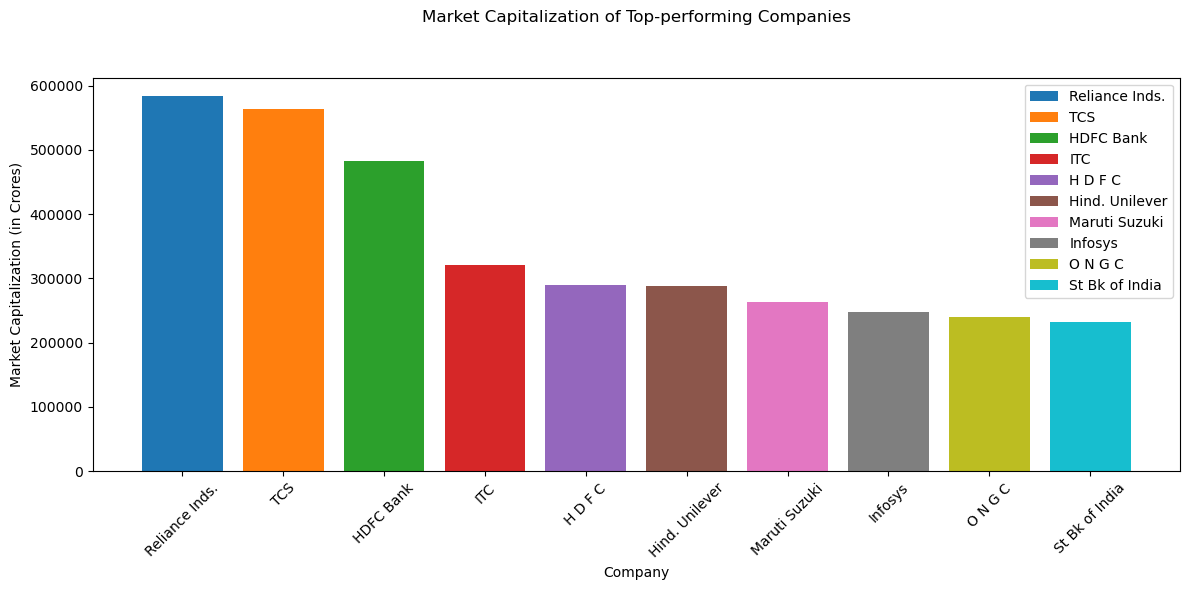

In [36]:
# Market Capitalization of top performing Companies

sorted_df = df.sort_values(by='Mar Cap - Crore', ascending=False)

# Select the top-performing companies (e.g., top 10)
top_companies = sorted_df.head(10)

# Plot the growth trajectory of top-performing companies using bar graph
plt.figure(figsize=(12, 6))

# Plot market capitalization evolution using bar graph
for company in top_companies['Name']:
    company_data = df[df['Name'] == company]
    plt.bar(company_data['Name'], company_data['Mar Cap - Crore'], label=company)

plt.title('Market Capitalization of Top-performing Companies',pad=40)
plt.xlabel('Company')
plt.ylabel('Market Capitalization (in Crores)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

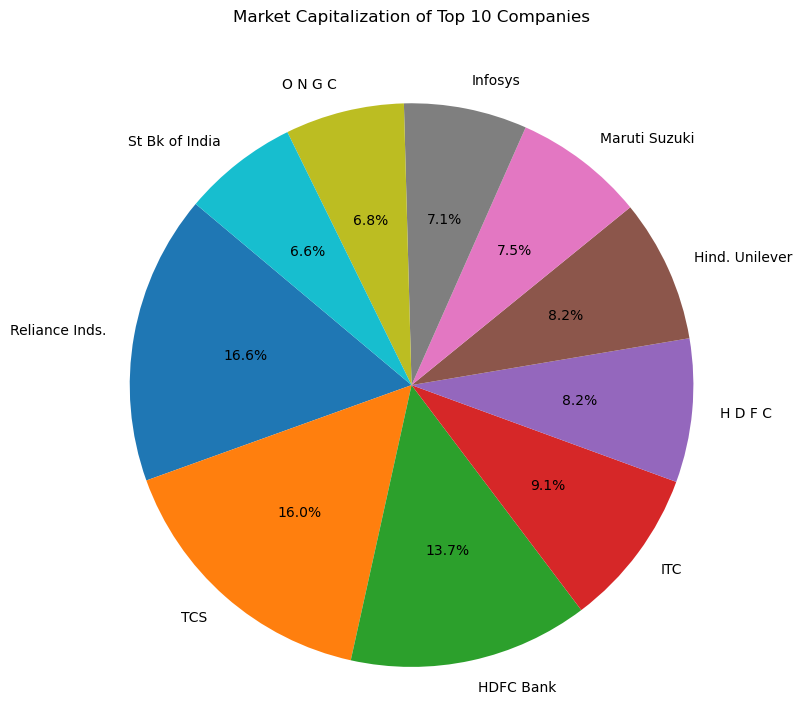

In [37]:
# Caculating Market Capitalization of top 10 companies

# Sort the DataFrame by market capitalization
sorted_df = df.sort_values(by='Mar Cap - Crore', ascending=False)

# Select the top-performing companies (top 10)
top_companies = sorted_df.head(10)

# Plot the market capitalization of top-performing companies as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_companies['Mar Cap - Crore'], labels=top_companies['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Capitalization of Top 10 Companies', pad=40)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

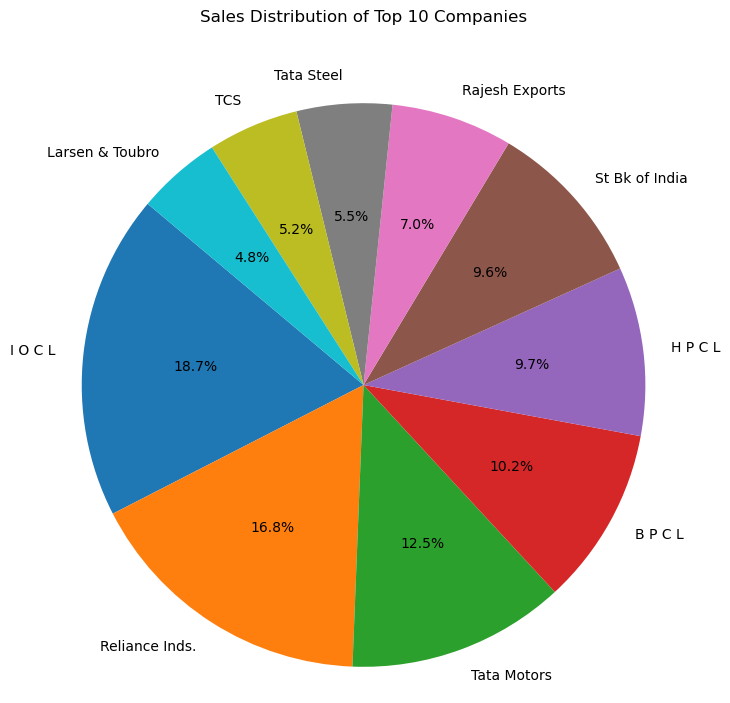

In [38]:
# Caculating Sales Distribution of top 10 companies

# Sort the DataFrame by quarterly sales
sorted_df = df.sort_values(by='Sales Qtr - Crore', ascending=False)

# Select the top-performing companies (top 10)
top_companies = sorted_df.head(10)

# Plot the sales distribution of top-performing companies as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_companies['Sales Qtr - Crore'], labels=top_companies['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution of Top 10 Companies', pad=40)  # Add pad parameter to adjust space
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

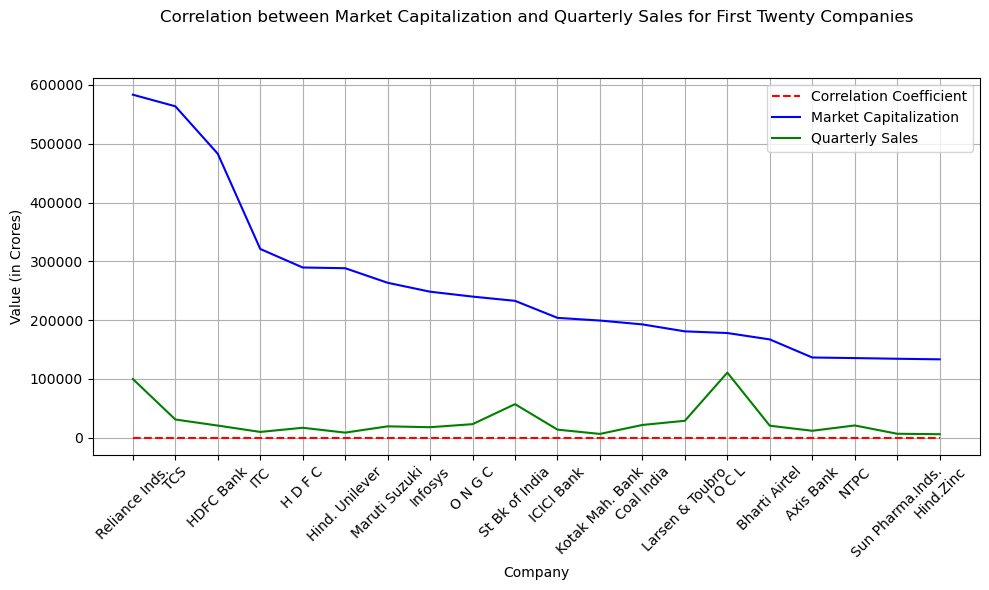

In [39]:
# Corelation between Market capitalization and Quately  Sales for top 20 companies


df_first_20 = df.head(20)

# Calculate correlation coefficient
correlation = df_first_20['Mar Cap - Crore'].corr(df_first_20['Sales Qtr - Crore'])

# Plot the correlation coefficient for each company
plt.figure(figsize=(10, 6))
plt.plot(range(len(df_first_20)), [correlation] * len(df_first_20), linestyle='--', color='red', label='Correlation Coefficient')
plt.plot(range(len(df_first_20)), df_first_20['Mar Cap - Crore'], label='Market Capitalization', color='blue')
plt.plot(range(len(df_first_20)), df_first_20['Sales Qtr - Crore'], label='Quarterly Sales', color='green')
plt.title('Correlation between Market Capitalization and Quarterly Sales for First Twenty Companies', pad =40)
plt.xlabel('Company')
plt.ylabel('Value (in Crores)')
plt.xticks(range(len(df_first_20)), df_first_20['Name'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

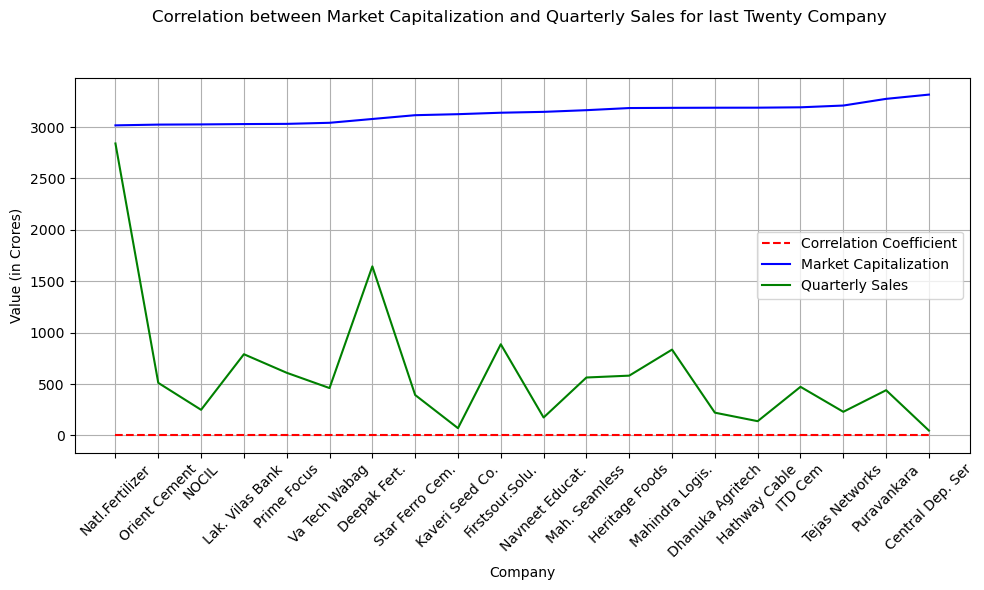

In [40]:
# Corelation between Market capitalization and Quately  Sales for last 20 companies

# Sort the DataFrame by market capitalization in ascending order
sorted_df = df.sort_values(by='Mar Cap - Crore', ascending=True)

# Select the top 20 smallest companies
smallest_companies = sorted_df.head(20)

# Calculate correlation coefficient
correlation = smallest_companies['Mar Cap - Crore'].corr(smallest_companies['Sales Qtr - Crore'])

# Plot the correlation coefficient for each company
plt.figure(figsize=(10, 6))
plt.plot(range(len(smallest_companies)), [correlation] * len(smallest_companies), linestyle='--', color='red', label='Correlation Coefficient')
plt.plot(range(len(smallest_companies)), smallest_companies['Mar Cap - Crore'], label='Market Capitalization', color='blue')
plt.plot(range(len(smallest_companies)), smallest_companies['Sales Qtr - Crore'], label='Quarterly Sales', color='green')
plt.title('Correlation between Market Capitalization and Quarterly Sales for last Twenty Company ', pad=40)
plt.xlabel('Company')
plt.ylabel('Value (in Crores)')
plt.xticks(range(len(smallest_companies)), smallest_companies['Name'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

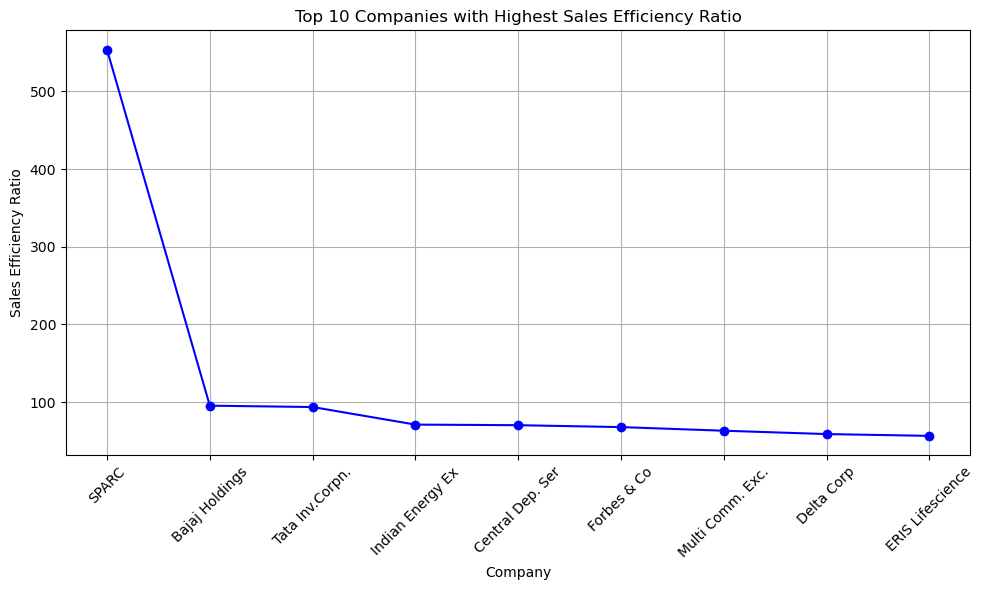

In [41]:
# Sort DataFrame by sales efficiency ratio in descending order
sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=False)

# Select top 10 companies with the largest sales efficiency ratio
top_10_largest_sales_eff_ratio = sorted_df.head(10)

# Filter out infinite values if present
top_10_largest_sales_eff_ratio = top_10_largest_sales_eff_ratio[top_10_largest_sales_eff_ratio['Sales Efficiency Ratio'] != float('inf')]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_largest_sales_eff_ratio['Name'], top_10_largest_sales_eff_ratio['Sales Efficiency Ratio'], marker='o', color='blue')
plt.title('Top 10 Companies with Highest Sales Efficiency Ratio')
plt.xlabel('Company')
plt.ylabel('Sales Efficiency Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


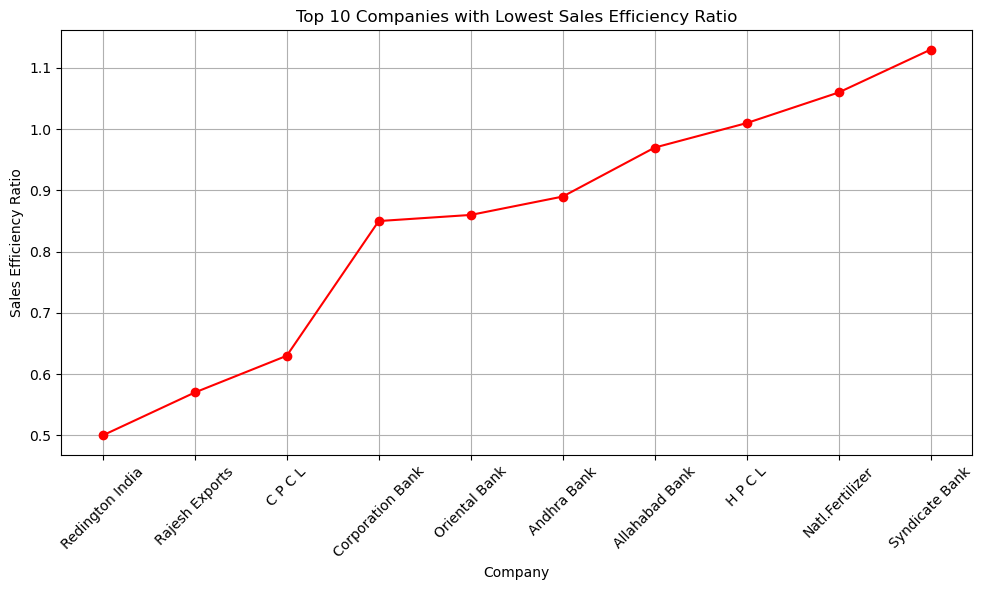

In [42]:
# Sort DataFrame by sales efficiency ratio in ascending order
sorted_df = df.sort_values(by='Sales Efficiency Ratio', ascending=True)

# Select top 10 companies with the lowest sales efficiency ratio
top_10_smallest_sales_eff_ratio = sorted_df.head(10)

# Filter out infinite values if present
top_10_smallest_sales_eff_ratio = top_10_smallest_sales_eff_ratio[top_10_smallest_sales_eff_ratio['Sales Efficiency Ratio'] != float('inf')]

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_smallest_sales_eff_ratio['Name'], top_10_smallest_sales_eff_ratio['Sales Efficiency Ratio'], marker='o', color='red')
plt.title('Top 10 Companies with Lowest Sales Efficiency Ratio')
plt.xlabel('Company')
plt.ylabel('Sales Efficiency Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


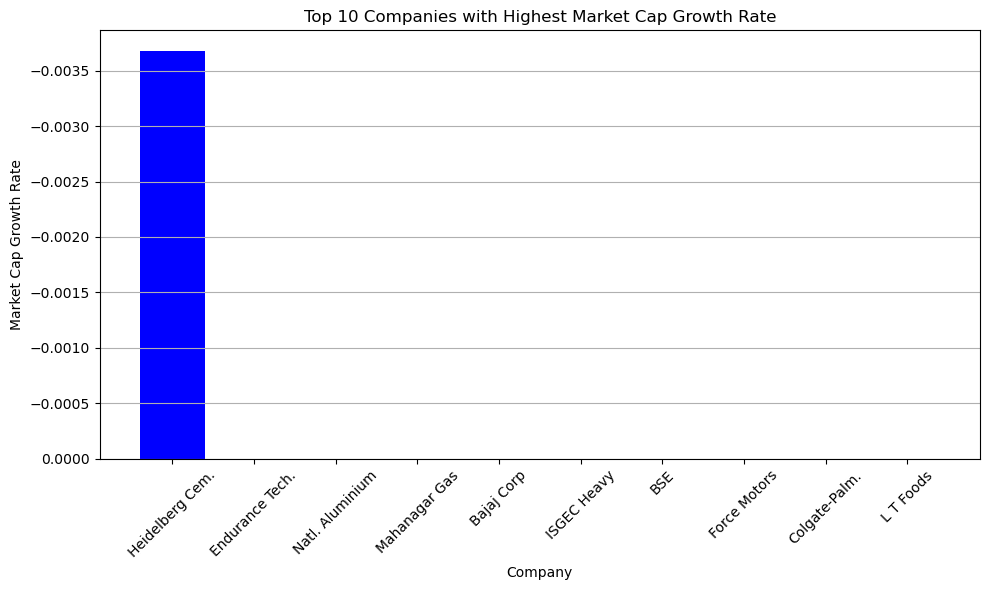

In [43]:
# top 10 companies with highest market cap growth rate

# Sort DataFrame by market capitalization growth rate in descending order and select top 10
top_10_highest_mar_cap_growth = df.sort_values(by='Market Cap Growth Rate', ascending=False).head(10)

# Reverse the order of the DataFrame
top_10_highest_mar_cap_growth = top_10_highest_mar_cap_growth[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot top 10 companies with the highest market capitalization growth rate
plt.bar(top_10_highest_mar_cap_growth['Name'], top_10_highest_mar_cap_growth['Market Cap Growth Rate'], color='blue')

plt.title('Top 10 Companies with Highest Market Cap Growth Rate')
plt.xlabel('Company')
plt.ylabel('Market Cap Growth Rate')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to reverse the order of bars
plt.grid(axis='y')
plt.tight_layout()
plt.show()


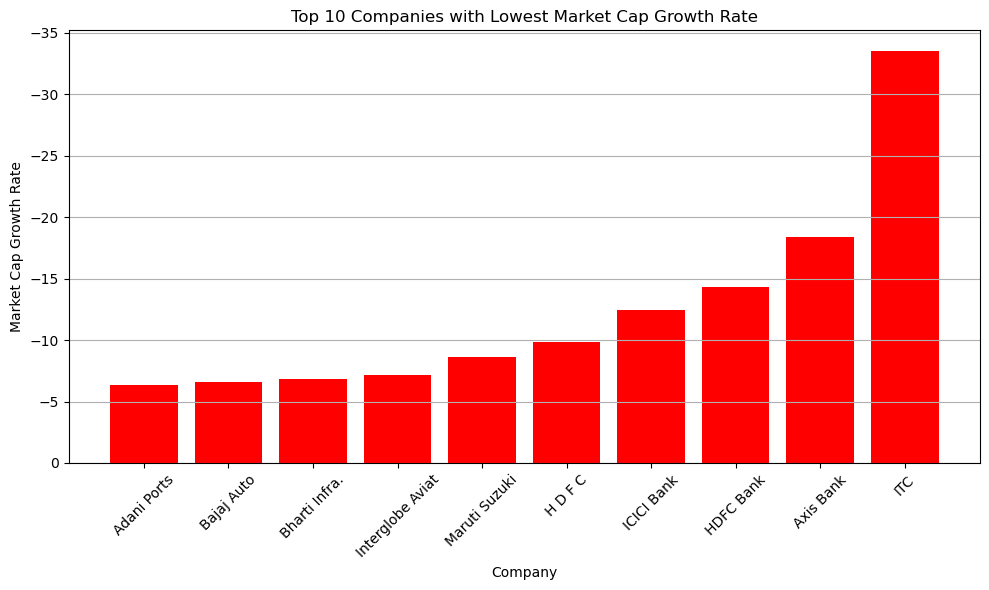

In [44]:
# top 10 companies with lowest market cap growth rate


# Sort DataFrame by market capitalization growth rate in ascending order and select top 10
top_10_lowest_mar_cap_growth = df.sort_values(by='Market Cap Growth Rate', ascending=True).head(10)

# Reverse the order of the DataFrame
top_10_lowest_mar_cap_growth = top_10_lowest_mar_cap_growth[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot top 10 companies with the lowest market capitalization growth rate
plt.bar(top_10_lowest_mar_cap_growth['Name'], top_10_lowest_mar_cap_growth['Market Cap Growth Rate'], color='red')

plt.title('Top 10 Companies with Lowest Market Cap Growth Rate')
plt.xlabel('Company')
plt.ylabel('Market Cap Growth Rate')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to reverse the order of bars
plt.grid(axis='y')
plt.tight_layout()
plt.show()

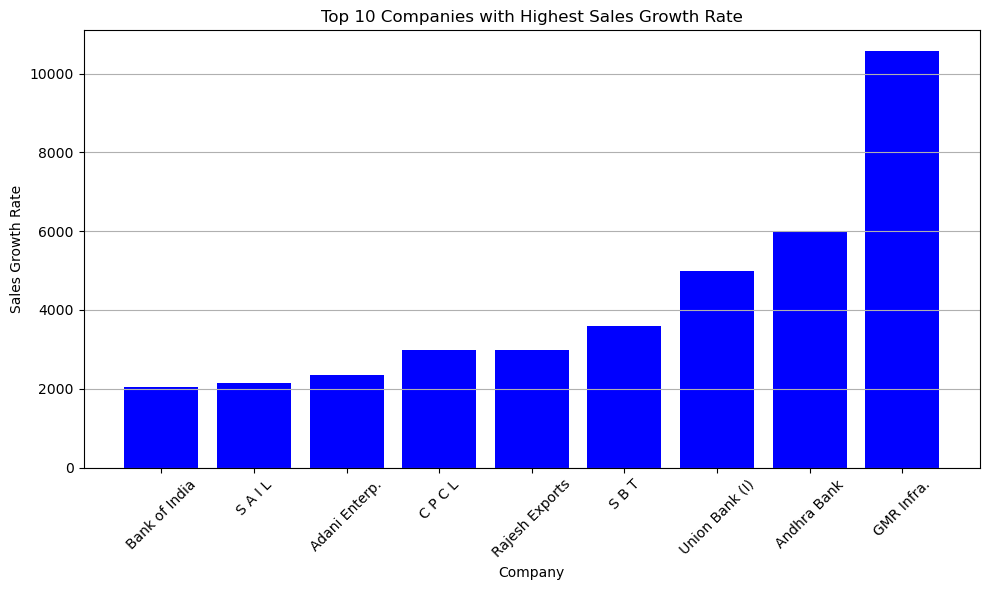

In [49]:
#top 10 companioes with highest sales growth rate


# Sort DataFrame by sales growth rate in descending order and select top 10
top_10_highest_sales_growth = df.sort_values(by='Sales Growth Rate', ascending=False).head(10)

# Reverse the order of the DataFrame
top_10_highest_sales_growth = top_10_highest_sales_growth[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot top 10 companies with the highest sales growth rate
plt.bar(top_10_highest_sales_growth['Name'], top_10_highest_sales_growth['Sales Growth Rate'], color='blue')

plt.title('Top 10 Companies with Highest Sales Growth Rate')
plt.xlabel('Company')
plt.ylabel('Sales Growth Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


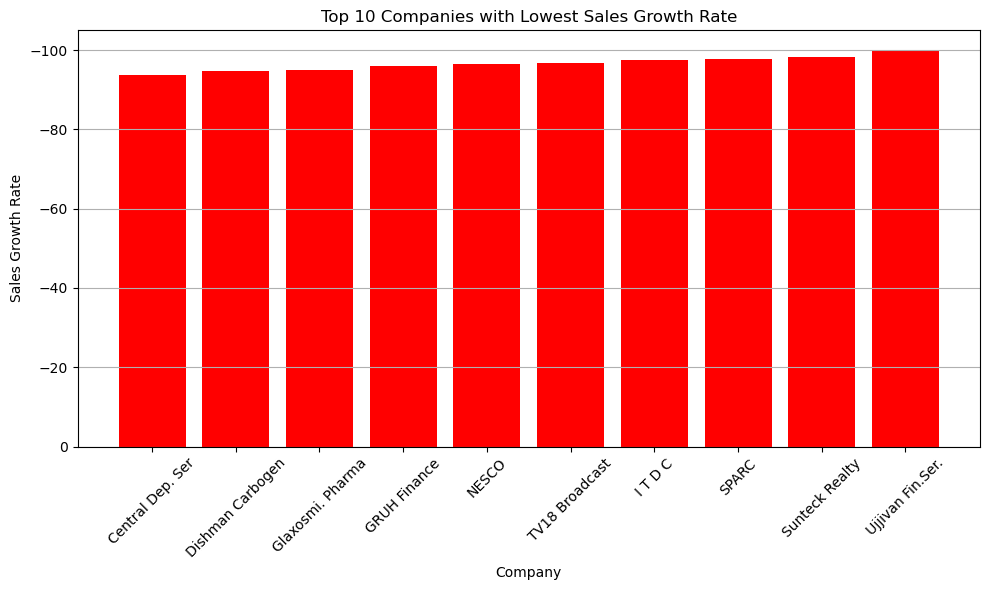

In [46]:
# Sort DataFrame by sales growth rate in ascending order and select top 10
top_10_lowest_sales_growth = df.sort_values(by='Sales Growth Rate', ascending=True).head(10)

# Reverse the order of the DataFrame
top_10_lowest_sales_growth = top_10_lowest_sales_growth[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot top 10 companies with the lowest sales growth rate
plt.bar(top_10_lowest_sales_growth['Name'], top_10_lowest_sales_growth['Sales Growth Rate'], color='red')

plt.title('Top 10 Companies with Lowest Sales Growth Rate')
plt.xlabel('Company')
plt.ylabel('Sales Growth Rate')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to reverse the order of bars
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Insights
1. Reliance Industries  has the biggest market cap share
2. Natl. Fertilizers  has the smallest market share
3. IOCL  has the highest market cap growth rate
4. ITC has the lowest market cap growth rate
5. GMR Infra. has the highest sales growth rate
6. Ujjivan Financial Services (0.0) has the lowest sales growth rate
7. Reliance Industries has the highest Correlation between Market Capitalization and Quarterly Sales
8. Natl Fertilizer has the lowest correlation between Market Capitalization and Quarterly Sales
9. SPARC has the highest Sales Efficiency Ratio
10. Ujjivan Financial Services has the lowest sales Sales Efficiency Ratio